# <center><font color='blue'>Homework Assignment Class 4</font></center>
# <center><font color='blue'> Part 2: Linear Regression</font></center>

In this assignment, you are asked to perform two regression analyses, the first a simple linear regression (one independent variable) and the other a multiple linear regression (3 independent variables). The pickled data (Advertising) which you encountered in Class 2 is contained in the folder 'data/Advertising.pkl' . The dependent (target) variable is **Sales** (in units of product) and the independent variables are budgets for **TV**, **Radio** and **Newspaper**. The objective of this assignment is to build linear models that assess the impact of these budgets on sales.  
  
In the  simple linear regression you are asked to find a linear predictive relationship between the TV budget and sales. You are asked to do a training/test split with 75% of the data for training, and the remainder for testing.

In the multiple linear regression, you are asked to model the linear predictive relationship of the three budgets - TV, Radio and Newspaper - on Sales. In order to keep things simple, you are not asked to do a training/test split of the sample.

For both regressions, use the *LinearRegression* model from *sklearn*.
</font>

In [55]:
# Read the data - done for you
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
advertising = pd.read_pickle("Advertising.pkl")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
# (3 pts) In this cell, fit a linear regression of Sales on TV by 
# (1) creating # an sklearn LinearRegression object, 
# (2) creating an X DataFrame which drops 'Sales', 
# (3) then with y as sales and only the 'TV' column from X, 
#     perform a 75%/25% training/test split, and 
# (4) fit the LinearRegression object.

In [57]:
regr = linear_model.LinearRegression()
regr
from sklearn.model_selection import train_test_split
x=advertising.drop('Sales',axis=1)
y=advertising.Sales
# Split the data into training/testing sets

X_train,X_test,y_train,y_test=train_test_split(x[['TV']],y,test_size=0.25)
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# (1 pt)
# Using the fitted LinearRegression object in this cell, 
# (1) Predict y values for the test set, and
# (2) Display the (i) intercept, (ii) slope, (iii) mean squared 
#     error (MSE), and (iv) R2 (R squared).


In [73]:
y_pred = regr.predict(X_test)
# Intercept
print('Intercept: \n', regr.intercept_)
#Slope
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % sklearn.metrics.mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % sklearn.metrics.r2_score(y_test,y_pred))

Intercept: 
 [7.03259355]
Coefficients: 
 [[0.04753664]]
Mean squared error: 11.15
Variance score: 0.60


In [74]:
# (1 pt)
# Produce a training/test scattergram with the regression 
# line.

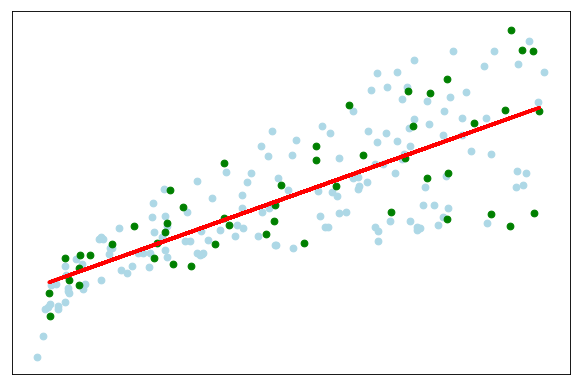

In [75]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_train, y_train,  color='lightblue')
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [62]:
# (2 pts) In this cell, create an sklearn LinearRegression object   
# and fit it with y = sales and X (from the 'drop' command). Do not  
# do a train/test split. 

In [78]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
#x =advertising[['TV']]
regr.fit(x,advertising.Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

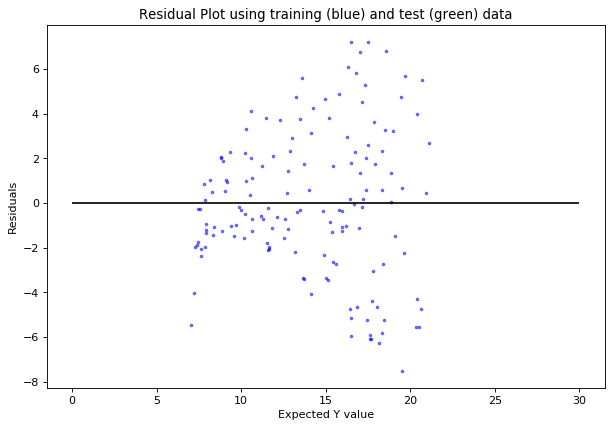

In [79]:
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(regr.predict(X_train),((y_train)-regr.predict(X_train)), c='b', s=5, alpha=0.5)
#plt.scatter(lm2.predict(X_test), lm2.predict(X_test) - Y_test, c='g', s=5, alpha=0.5)
plt.hlines(y=0,xmin=0, xmax=30)
plt.xlabel('Expected Y value')
plt.ylabel('Residuals')
plt.title('Residual Plot using training (blue) and test (green) data')
plt.show()

In [80]:
# (1 pt) Produce a $\hat{Y}$ vs $Y$ (y asis 'predicted', x 
# axis = 'actual')

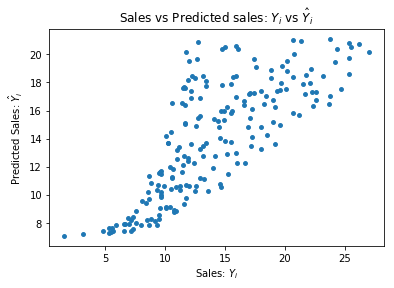

In [81]:
plt.scatter(advertising.Sales, regr.predict(),s=15)
plt.xlabel('Sales: $Y_i$')
plt.ylabel('Predicted Sales: $\hat{Y}_i$')
plt.title('Sales vs Predicted sales: $Y_i$ vs $\hat{Y}_i$')
plt.show()

In [70]:
# (1 pt) Display (a) intercept, (b) coefficients, (c) MSE, 
# and (d) R2.

In [71]:
# Intercept
print('Intercept: \n', regr.intercept_)
# Slope
print('Coefficients: \n', regr.coef_)
print(advertising[['TV','Sales']].corr())
# The mean squared error
print('Mean squared error:',sklearn.metrics.mean_squared_error(X, y_fitted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % sklearn.metrics.r2_score(y,y_fitted))


Intercept: 
 [7.03259355]
Coefficients: 
 [[0.04753664]]
             TV     Sales
TV     1.000000  0.782224
Sales  0.782224  1.000000
Mean squared error: 24347.712147084345
Variance score: 0.61
